In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##Question Number 1: Data Exploration of tandem data



About Dataset: Trip Duration (seconds) , Start Time and Date , End Time and Date ,
Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End
Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID ,
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) ,
Member Year of Birth, Member Gender



a. Read the entire dataset using pandas dataframe and build the file by appending
each file in an optimized manner



In [80]:
df_1 = pd.read_csv('/content/201803-fordgobike-tripdata.csv')
df_2 = pd.read_csv('/content/201807-fordgobike-tripdata.csv')
df_3 = pd.read_csv('/content/201811-fordgobike-tripdata.csv')
df_4 = pd.read_csv('/content/201812-fordgobike-tripdata.csv')

df = pd.concat([df_1, df_2, df_3, df_4])
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No


In [81]:
df['member_gender'].unique()

array(['Female', 'Male', nan, 'Other'], dtype=object)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576102 entries, 0 to 131362
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             576102 non-null  int64  
 1   start_time               576102 non-null  object 
 2   end_time                 576102 non-null  object 
 3   start_station_id         572242 non-null  float64
 4   start_station_name       572242 non-null  object 
 5   start_station_latitude   576102 non-null  float64
 6   start_station_longitude  576102 non-null  float64
 7   end_station_id           572242 non-null  float64
 8   end_station_name         572242 non-null  object 
 9   end_station_latitude     576102 non-null  float64
 10  end_station_longitude    576102 non-null  float64
 11  bike_id                  576102 non-null  int64  
 12  user_type                576102 non-null  object 
 13  member_birth_year        544529 non-null  float64
 14  member_ge

b. What was the time duration for the average trip taken? (Use plotting techniques and
write your observations for the same.)


In [83]:
df['duration_sec'].mean()

np.float64(834.4304272507298)

In [84]:
Q1 = df['duration_sec'].quantile(0.25)
Q3 = df['duration_sec'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['duration_sec'] >= lower_bound) & (df['duration_sec'] <= upper_bound)]

df_no_outliers['duration_sec'].mean()

np.float64(591.8214026418533)

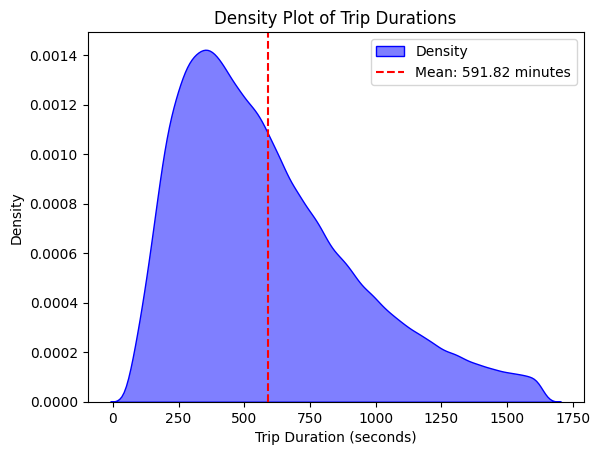

In [85]:
trip_durations = df_no_outliers['duration_sec']

mean_duration = trip_durations.mean()

sns.kdeplot(trip_durations, color='blue', fill=True, alpha=0.5, label='Density')
mean_duration = sum(trip_durations) / len(trip_durations)
plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_duration:.2f} minutes')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Density')
plt.title('Density Plot of Trip Durations')
plt.legend()
plt.show()


*While polotting the graph for duration to find out the mean it is observed that the dataset is highly skewed towards the left so to get a proper representation we removed the outliers to get a proper representation. The density plot illustrates the distribution of trip durations. The mean trip duration, represented by the dashed red line, provides a central tendency measure.  The plot shows the typical duration of bike trips and how frequently different durations occur, with the peak indicating the most common trip length.*


c. Is there any correlation between the months and the trip duration? Use scatter plot
and comment your observations from the plot


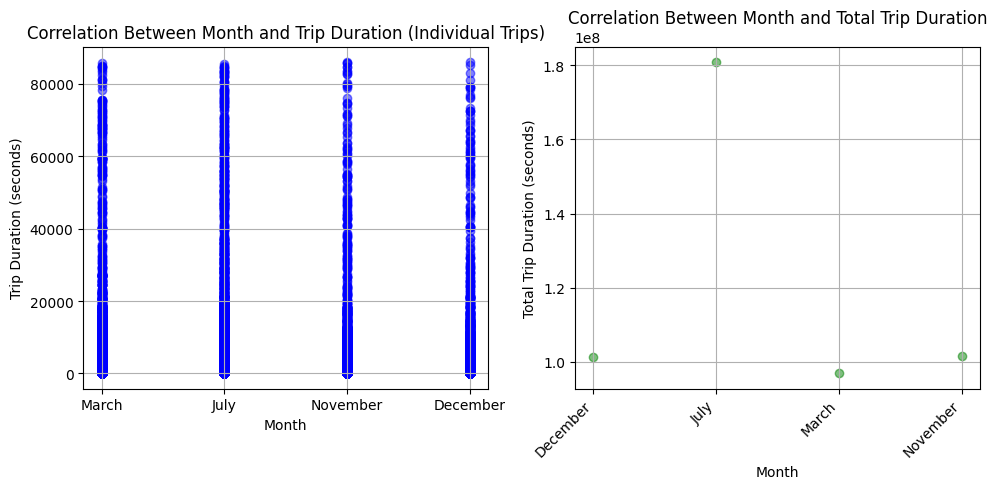

In [86]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['month'] = df['start_time'].dt.month

months_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = df['month'].apply(lambda x: months_name[x - 1])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['month'], df['duration_sec'], alpha=0.5, color='blue')
plt.xlabel('Month')
plt.ylabel('Trip Duration (seconds)')
plt.title('Correlation Between Month and Trip Duration (Individual Trips)')
plt.grid(True)

monthly_duration = df.groupby('month')['duration_sec'].sum().reset_index()

plt.subplot(1, 2, 2)
plt.scatter(monthly_duration['month'], monthly_duration['duration_sec'], alpha=0.5, color='green')
plt.xlabel('Month')
plt.ylabel('Total Trip Duration (seconds)')
plt.title('Correlation Between Month and Total Trip Duration')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

*Yes. There is a correlation between month of the trip and trip duration. as we can see that the trips happenin the month of March, July, November, December. And duration wise the month of July has the highest sum of total duration amongst all.*


d. Do seasons affect the duration of a trip ? Comment your observations.



*Yes. as we can see seasons do affect the duration of the trips i.e. the month July has the highest number of high duration of trips*

e. Using multivariate exploration, explain whether there is any relation between short
trips and the users.

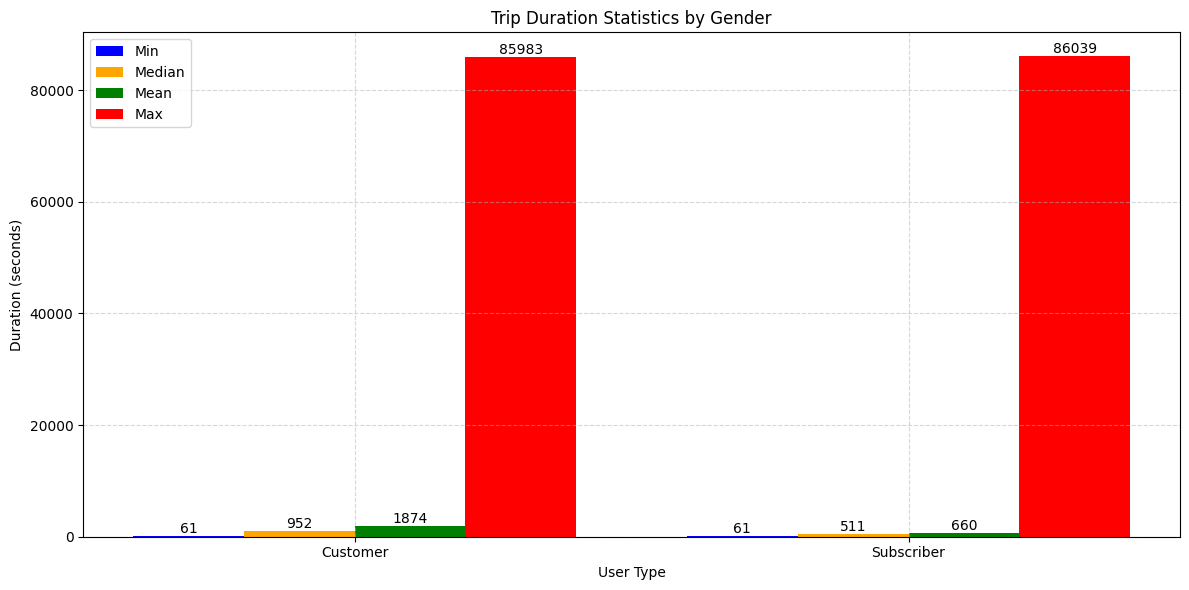

In [87]:
user_wise = df.groupby('user_type')['duration_sec']

stats = user_wise.agg(['min', 'max', 'median', 'mean']).reset_index()

labels = stats['user_type']
x = range(len(labels))
width = 0.2

plt.figure(figsize=(12, 6))

min_bars = plt.bar([p - width*1.5 for p in x], stats['min'], width, label='Min', color='blue')
median_bars = plt.bar([p - width/2 for p in x], stats['median'], width, label='Median', color='orange')
mean_bars = plt.bar([p + width/2 for p in x], stats['mean'], width, label='Mean', color='green')
max_bars = plt.bar([p + width*1.5 for p in x], stats['max'], width, label='Max', color='red')

for bars in [min_bars, median_bars, mean_bars, max_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')
plt.title('Trip Duration Statistics by Gender')
plt.xticks(x, labels)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

*If we observe the above graph we can see that in user type if we compare them on an average Customers take longer durations trip than Suscribers.*

##Question Number 2:

a. Create a Matrix between 0 and 1, with each value difference of 0.01.


In [88]:
matrix = np.arange(0, 1.1, 0.01).reshape(11, 10)
print(matrix)

[[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
 [0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19]
 [0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29]
 [0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39]
 [0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49]
 [0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59]
 [0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69]
 [0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79]
 [0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89]
 [0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]
 [1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09]]


b. Create an array of 20 linearly spaced points between 0 and 1.


In [89]:
points = np.linspace(0, 1, 20)
print(points)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


c. Create a 5*5 matrix using range 1 to 26, and return sum of the matrix, standard
deviation and sum of all the columns of the matrix.

In [90]:
matrix = np.arange(1, 26).reshape(5, 5)

matrix_sum = np.sum(matrix)

matrix_std_dev = np.std(matrix)

column_sums = np.sum(matrix, axis=0)

print("Matrix:")
print(matrix)
print("\nSum of the matrix:", matrix_sum)
print("Standard deviation of the matrix:", matrix_std_dev)
print("Sum of all columns:", column_sums)


Matrix:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]

Sum of the matrix: 325
Standard deviation of the matrix: 7.211102550927978
Sum of all columns: [55 60 65 70 75]


##Question Number 3:

import numpy as np

x = np.arange(0,100)

y = x*2

z = x**2


In [91]:
x = np.arange(0,100)

y = x*2

z = x**2

print(x)
print(y)
print(z)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198]
[   0    1    4    9   16   25   36   49   64   81  100  121  144  169
  196  225  256  289  324  361  400  441  484  529  576  625  676  729
  784  841  900  961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681
 1764 1849 1936 2025 2116 2209 2304 2401 2500 2601 2704 2809 2916 3025
 31

a. Create a figure object and axis of the figure canvas at axis1 = [0,0,1,1]. Provide
necessary labels and title to the plot.


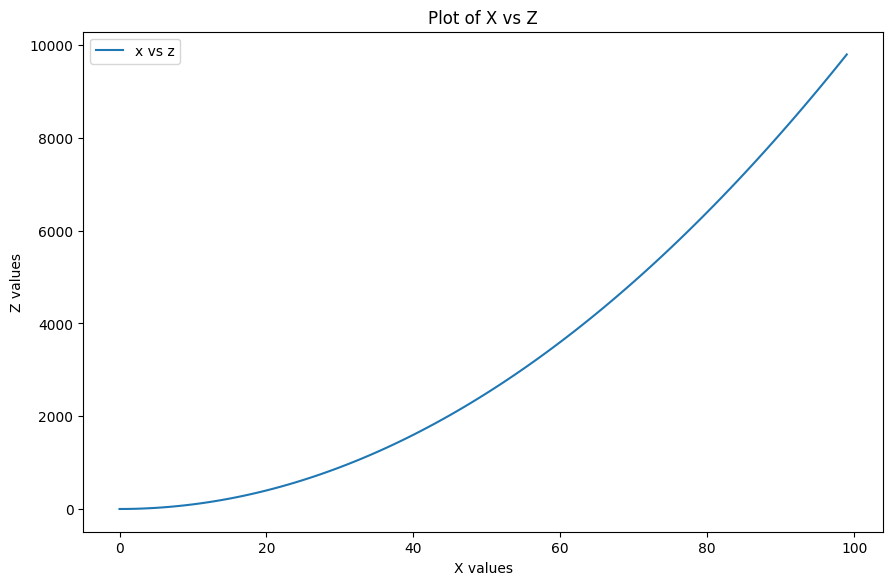

In [92]:
fig = plt.figure(figsize=(8, 5))
axis1 = fig.add_axes([0, 0, 1, 1])
axis1.plot(x, z, label='x vs z')
axis1.set_xlabel('X values')
axis1.set_ylabel('Z values')
axis1.set_title('Plot of X vs Z')
axis1.legend()
plt.show()

b. Create another plot at axis1 = [0,0,1,1] and axis2 = [0.2,0.5,0.2,0.2]


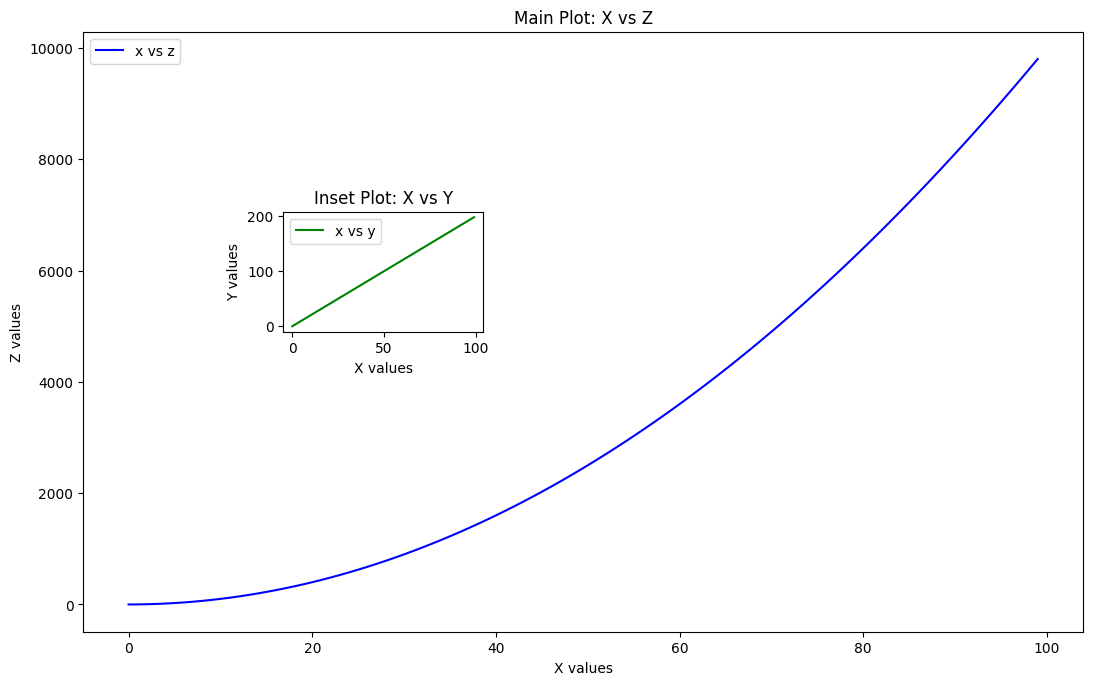

In [93]:
fig = plt.figure(figsize=(10, 6))
axis1 = fig.add_axes([0, 0, 1, 1])
axis1.plot(x, z, label='x vs z', color='blue')
axis1.set_title('Main Plot: X vs Z')
axis1.set_xlabel('X values')
axis1.set_ylabel('Z values')
axis1.legend()

axis2 = fig.add_axes([0.2, 0.5, 0.2, 0.2])
axis2.plot(x, y, label='x vs y', color='green')
axis2.set_title('Inset Plot: X vs Y')
axis2.set_xlabel('X values')
axis2.set_ylabel('Y values')
axis2.legend()
plt.show()

c. Create a plot by adding two axis object at [0,0,1,1] & [0.2,0.5,0.4,0.4]


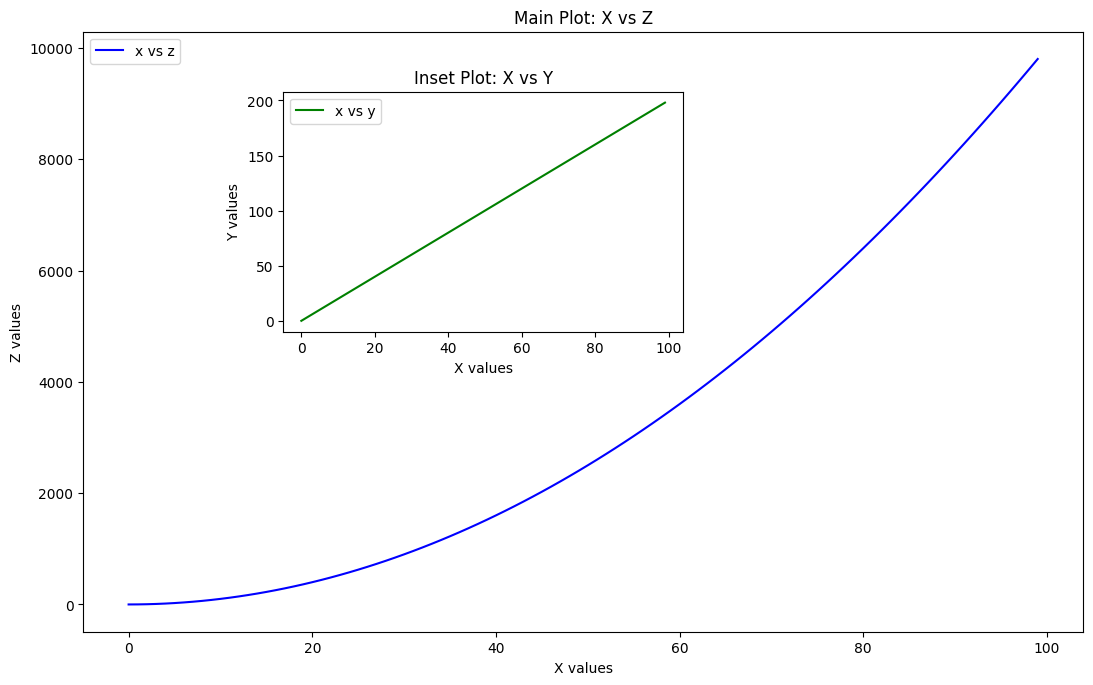

In [94]:
fig = plt.figure(figsize=(10, 6))
axis1 = fig.add_axes([0, 0, 1, 1])
axis1.plot(x, z, label='x vs z', color='blue')
axis1.set_title('Main Plot: X vs Z')
axis1.set_xlabel('X values')
axis1.set_ylabel('Z values')
axis1.legend()

axis2 = fig.add_axes([0.2, 0.5, 0.4, 0.4])
axis2.plot(x, y, label='x vs y', color='green')
axis2.set_title('Inset Plot: X vs Y')
axis2.set_xlabel('X values')
axis2.set_ylabel('Y values')
axis2.legend()
plt.show()

d. Use x, y, z array to create the plots

i. Between x and z arrays

ii. Between x & y arrays by setting the x-limit in range 20-22 and y-limit range in 30-50

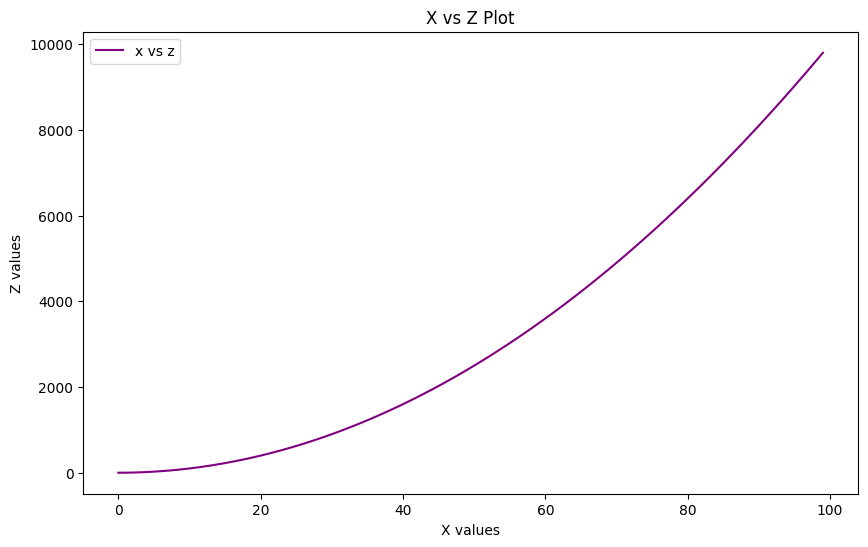

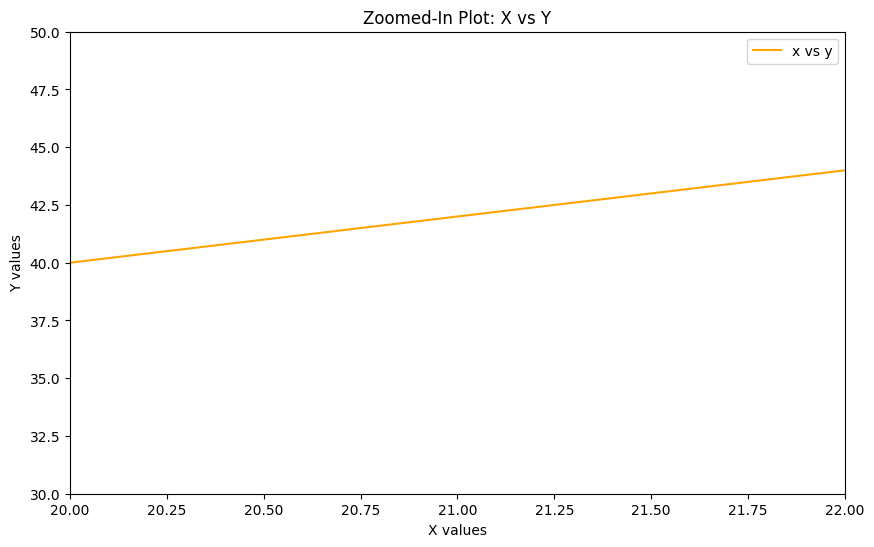

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, z, label='x vs z', color='purple')
ax.set_title('X vs Z Plot')
ax.set_xlabel('X values')
ax.set_ylabel('Z values')
ax.legend()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, label='x vs y', color='orange')
ax.set_xlim(20, 22)
ax.set_ylim(30, 50)
ax.set_title('Zoomed-In Plot: X vs Y')
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.legend()
plt.show()

##Question Number 4: The purchase analysis of walmart.

In [96]:
df = pd.read_csv('/content/walmart_purchase_data.csv')
df.head(3)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95


a. What is the average Purchase Price?


In [97]:
print('Average Purchase Price : ',df['Purchase Price'].mean())

Average Purchase Price :  50.347302


b. What were the highest and lowest purchase prices?


In [98]:
print('Highest Purchase Price : ',df['Purchase Price'].max())
print('Lowest Purchase Price : ',df['Purchase Price'].min())

Highest Purchase Price :  99.99
Lowest Purchase Price :  0.0


c. How many people have English 'en' as their Language of choice on the website?


In [99]:
print("No of people with English Language : ", len(df[df['Language'] == 'en']))

No of people with English Language :  1098


d. What is the email of the person with the following Credit Card Number:
4926535242672853


In [100]:
df[df['Credit Card'] == 4926535242672853]['Email']

,Email
1234,bondellen@williams-garza.com


e. Someone made a purchase that came from Lot: "90 WT" , what was the Purchase
Price for this transaction?

In [101]:
df[df['Lot'] == '90 WT']['Purchase Price']

,Purchase Price
513,75.1


f. How many people have American Express as their Credit Card Provider and made
a purchase above $95 ?

In [102]:
df_count = df[(df['CC Provider'] == 'American Express') & (df['Purchase Price'] > 95)]
print(len(df_count))

39


g. How many people have a credit card that expires in 2025?


In [103]:
df['CC Exp Date'] = pd.to_datetime(df['CC Exp Date'], format='%m/%y', errors='coerce')
df['Year'] = df['CC Exp Date'].dt.year
df_count = df[df['Year'] == 2025]
print(len(df_count))

1033


h. What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com,
etc...) ?


In [104]:
df['Email'] = df['Email'].str.split('@').str[1]
df['Email'].value_counts().head(5)

,count
Email,
hotmail.com,1638
yahoo.com,1616
gmail.com,1605
smith.com,42
williams.com,37


i. What are the 5 most common Job Titles?


In [105]:
df['Job'].value_counts().head(5)

,count
Job,
Interior and spatial designer,31
Lawyer,30
Social researcher,28
"Research officer, political party",27
"Designer, jewellery",27


j. How many people made the purchase during morning and evening time?

In [106]:
df.groupby('AM or PM')['AM or PM'].value_counts()

,count
AM or PM,
AM,4932
PM,5068
